# Classification model using Neural Networks

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Download the data from kaggle. 

<span style="color:red">**Note:** _Please make sure you have API token generated and store under `users/.kaggle/kaggle.json` more information can be found [here](https://www.kaggle.com/docs/api#getting-started-installation-&-authentication). Kaggle cli is required for this. `pip install kaggle`_</span>

Create a dataset directory and unzip the data to that directory.

In [4]:
!kaggle datasets download mohansacharya/graduate-admissions
!mkdir graduate-admission-datasets
!unzip -o graduate-admissions.zip -d graduate-admission-datasets/
!rm graduate-admissions.zip

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: graduate-admission-datasets: File exists
Archive:  graduate-admissions.zip
  inflating: graduate-admission-datasets//Admission_Predict.csv  
  inflating: graduate-admission-datasets//Admission_Predict_Ver1.1.csv  


In [5]:
data = pd.read_csv('graduate-admission-datasets/Admission_Predict.csv')
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
239,240,299,100,1,1.5,2.0,7.89,0,0.59
326,327,299,100,3,2.0,2.0,8.02,0,0.63
238,239,310,104,3,2.0,3.5,8.37,0,0.70
234,235,330,113,5,5.0,4.0,9.31,1,0.91
75,76,329,114,2,2.0,4.0,8.56,1,0.72


In [7]:
data.shape

(400, 9)

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [18]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admit_Probability']]

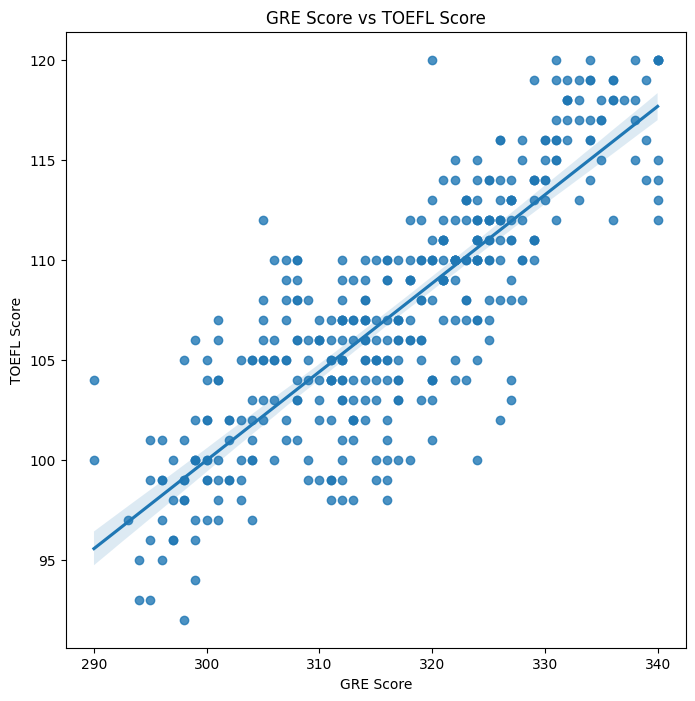

In [20]:
plt.figure(figsize=(8, 8))

fig = sns.regplot(x='GRE Score', y='TOEFL Score', data=data)
plt.title('GRE Score vs TOEFL Score')
plt.show()

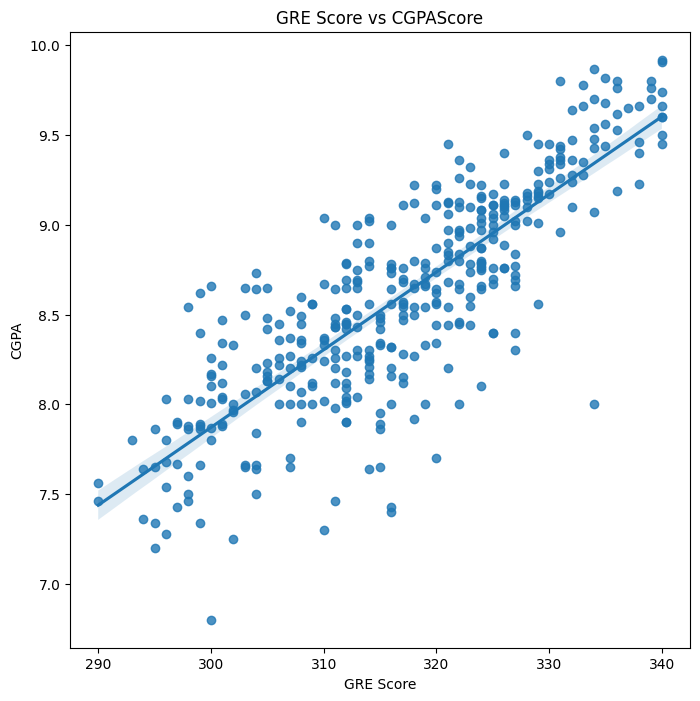

In [21]:
plt.figure(figsize=(8, 8))

fig = sns.regplot(x='GRE Score', y='CGPA', data=data)
plt.title('GRE Score vs CGPAScore')
plt.show()

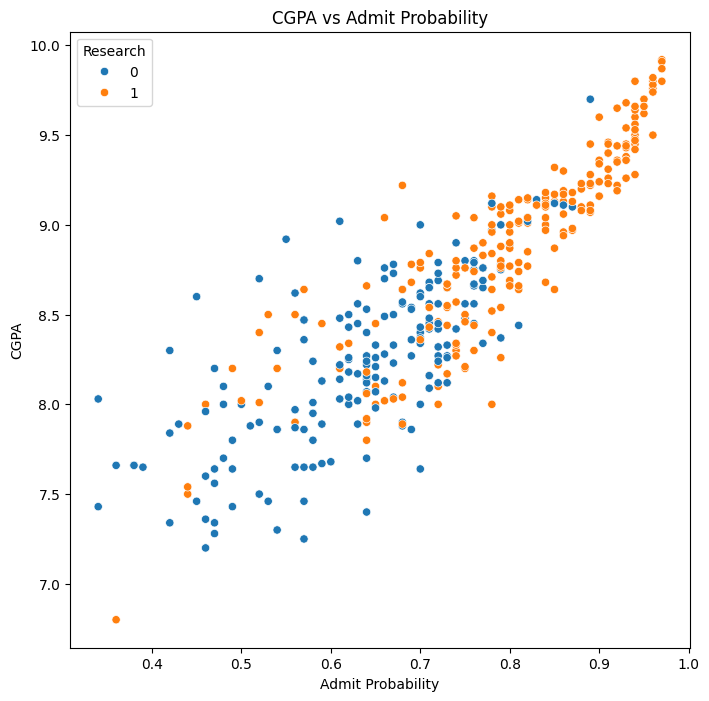

In [22]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x='Admit_Probability', y='CGPA', data=data, hue='Research')
plt.title('CGPA vs Admit Probability')
plt.xlabel('Admit Probability')
plt.ylabel('CGPA')
plt.show()

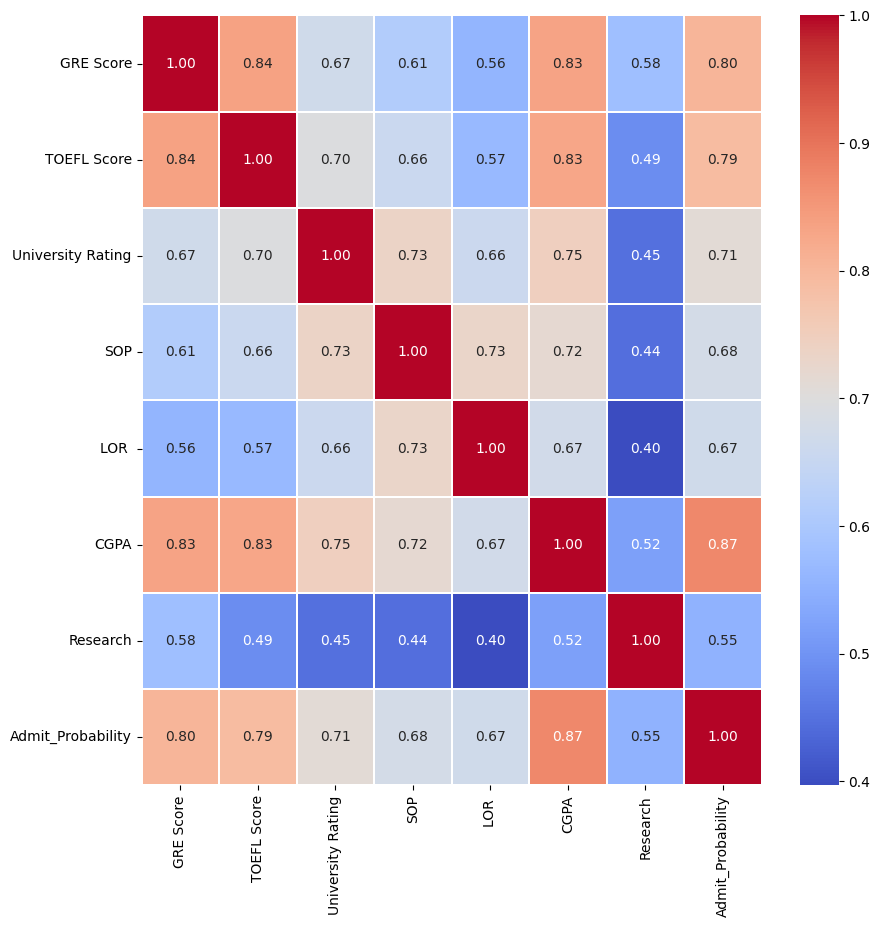

In [23]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.05)
plt.show()

In [25]:
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [26]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
162,0.104064,0.262293,3,-0.397769,-0.504260,-0.166101,0,0.67
247,-0.506794,-0.562528,2,-0.894980,0.052933,-0.199682,0,0.71
389,0.278595,0.097329,3,0.099442,0.610127,-0.266845,1,0.76
7,-0.768590,-1.057420,2,-0.397769,0.610127,-1.173537,0,0.68
179,-0.855855,-0.892456,3,-0.397769,-0.504260,-0.552285,0,0.73


In [27]:
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

features = data[col]
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [41]:
target = data[['Admit_Probability']]
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [50]:
y = target.copy()

In [53]:
# Categorize the values in 'target' into 0, 1, and 2 based on the conditions
y['Admit_Probability'] = np.where(target['Admit_Probability'] >= 0.8, 2, 
                                  np.where(target['Admit_Probability'] >= 0.6, 1, 0))

# Verify the changes
y.head()


,Admit_Probability
0,2
1,1
2,1
3,2
4,1


In [54]:
target = y 

In [55]:
target['Admit_Probability'].unique()

array([2, 1, 0])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [64]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(X_test.values).float()


In [65]:
Xtrain.shape, X_test.shape

(torch.Size([320, 5]), (80, 5))

In [68]:
Ytrain = torch.from_numpy(y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [69]:
Ytrain.shape, Ytest.shape

(torch.Size([320]), torch.Size([80]))

In [71]:
input_size = Xtrain.shape[1]
output_size = len(target['Admit_Probability'].unique())

In [72]:
class Net(nn.Module):
    def __init__(self, hidden_size, activation_fn= 'relu', apply_dropout=False):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.apply_dropout = None
        if apply_dropout:
            self.apply_dropout = nn.Dropout(0.2)
        

    def forward(self, x):
        acticvation_fn = None
        if self.activation_fn == 'relu':
            acticvation_fn = F.relu
        elif self.activation_fn == 'tanh':
            acticvation_fn = F.torch.tanh
        elif self.activation_fn == 'sigmoid':
            acticvation_fn = F.torch.sigmoid

        x = acticvation_fn(self.fc1(x))
        x = acticvation_fn(self.fc2(x))
        if self.apply_dropout != None:
            x = self.apply_dropout(x)
        
        x = acticvation_fn(self.fc3(x))
        return F.log_softmax(x, dim=-1)

In [86]:
def train_and_evaluate_model(model, learning_rate=0.001):
    epoch_data = []
    epochs = 1001

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_fn = nn.NLLLoss()

    test_accuracy = 0.0

    for epoch in range(1, epochs):
        
        optimizer.zero_grad()

        model.train()
        Ypred = model(Xtrain)

        loss = loss_fn(Ypred, Ytrain)
        loss.backward()

        optimizer.step()

        model.eval()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, predicted = Ypred_test.data.max(1)
        
        test_accuracy = predicted.eq(Ytest.data).sum().item() / y_test.values.size
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print(f'Epoch - {epoch} ({(epoch/150 *10)} %) | Train Loss - {loss.data.item()} | Test Loss - {loss_test.data.item()} | Test Accuracy - {test_accuracy}')
        
    return {
        'model': model,
        'epoch_data': epoch_data,
        'num_epochs': epochs, 
        'optimizer': optimizer,
        'loss_fn': loss_fn,
        'test_accuracy': test_accuracy,
        '_, pred': Ypred_test.data.max(1),
        'actual': Ytest
        }

In [87]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [88]:
result_3_sigmoid = train_and_evaluate_model(net)

Epoch - 100 (6.666666666666666 %) | Train Loss - 1.0865814685821533 | Test Loss - 1.0864694118499756 | Test Accuracy - 0.5
Epoch - 200 (13.333333333333332 %) | Train Loss - 1.0708869695663452 | Test Loss - 1.0701786279678345 | Test Accuracy - 0.5
Epoch - 300 (20.0 %) | Train Loss - 1.056466817855835 | Test Loss - 1.055123209953308 | Test Accuracy - 0.5
Epoch - 400 (26.666666666666664 %) | Train Loss - 1.0412288904190063 | Test Loss - 1.0389713048934937 | Test Accuracy - 0.5
Epoch - 500 (33.333333333333336 %) | Train Loss - 1.0252554416656494 | Test Loss - 1.0218816995620728 | Test Accuracy - 0.5
Epoch - 600 (40.0 %) | Train Loss - 1.0088622570037842 | Test Loss - 1.0042879581451416 | Test Accuracy - 0.5
Epoch - 700 (46.66666666666667 %) | Train Loss - 0.9911513328552246 | Test Loss - 0.9853225946426392 | Test Accuracy - 0.5
Epoch - 800 (53.33333333333333 %) | Train Loss - 0.9702808260917664 | Test Loss - 0.9630516767501831 | Test Accuracy - 0.5
Epoch - 900 (60.0 %) | Train Loss - 0.948

In [90]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (apply_dropout): Dropout(p=0.2, inplace=False)
)

In [91]:
result_3_sigmoid = train_and_evaluate_model(net, learning_rate=0.001)

Epoch - 100 (6.666666666666666 %) | Train Loss - 1.0868473052978516 | Test Loss - 1.0843862295150757 | Test Accuracy - 0.5
Epoch - 200 (13.333333333333332 %) | Train Loss - 1.0658254623413086 | Test Loss - 1.062782645225525 | Test Accuracy - 0.5
Epoch - 300 (20.0 %) | Train Loss - 1.0505069494247437 | Test Loss - 1.0448981523513794 | Test Accuracy - 0.5
Epoch - 400 (26.666666666666664 %) | Train Loss - 1.0367358922958374 | Test Loss - 1.0277884006500244 | Test Accuracy - 0.5
Epoch - 500 (33.333333333333336 %) | Train Loss - 1.0228326320648193 | Test Loss - 1.0108397006988525 | Test Accuracy - 0.5
Epoch - 600 (40.0 %) | Train Loss - 1.00065279006958 | Test Loss - 0.9941781759262085 | Test Accuracy - 0.5
Epoch - 700 (46.66666666666667 %) | Train Loss - 0.9907307624816895 | Test Loss - 0.9779656529426575 | Test Accuracy - 0.5
Epoch - 800 (53.33333333333333 %) | Train Loss - 0.9787428975105286 | Test Loss - 0.962506115436554 | Test Accuracy - 0.5
Epoch - 900 (60.0 %) | Train Loss - 0.96871

In [94]:
net = Net(hidden_size=50, activation_fn='tanh')
net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [95]:
result_50_tanh = train_and_evaluate_model(net)

Epoch - 100 (6.666666666666666 %) | Train Loss - 0.5953038930892944 | Test Loss - 0.5456869602203369 | Test Accuracy - 0.75
Epoch - 200 (13.333333333333332 %) | Train Loss - 0.5723662972450256 | Test Loss - 0.5305551886558533 | Test Accuracy - 0.7375
Epoch - 300 (20.0 %) | Train Loss - 0.5639409422874451 | Test Loss - 0.5305427312850952 | Test Accuracy - 0.75
Epoch - 400 (26.666666666666664 %) | Train Loss - 0.5556344985961914 | Test Loss - 0.5404874086380005 | Test Accuracy - 0.75
Epoch - 500 (33.333333333333336 %) | Train Loss - 0.5455865859985352 | Test Loss - 0.5470276474952698 | Test Accuracy - 0.75
Epoch - 600 (40.0 %) | Train Loss - 0.536004900932312 | Test Loss - 0.5476747155189514 | Test Accuracy - 0.75
Epoch - 700 (46.66666666666667 %) | Train Loss - 0.526913583278656 | Test Loss - 0.5458446741104126 | Test Accuracy - 0.75
Epoch - 800 (53.33333333333333 %) | Train Loss - 0.5178824663162231 | Test Loss - 0.5416795611381531 | Test Accuracy - 0.75
Epoch - 900 (60.0 %) | Train Lo

In [96]:
net = Net(hidden_size=1000, activation_fn='tanh')
net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [97]:
result_1000_tanh = train_and_evaluate_model(net)

Epoch - 100 (6.666666666666666 %) | Train Loss - 0.5235146284103394 | Test Loss - 0.5170415043830872 | Test Accuracy - 0.7625
Epoch - 200 (13.333333333333332 %) | Train Loss - 0.47957897186279297 | Test Loss - 0.5150982141494751 | Test Accuracy - 0.7625
Epoch - 300 (20.0 %) | Train Loss - 0.4686972200870514 | Test Loss - 0.5212072134017944 | Test Accuracy - 0.7875
Epoch - 400 (26.666666666666664 %) | Train Loss - 0.4666004180908203 | Test Loss - 0.5238133072853088 | Test Accuracy - 0.7875
Epoch - 500 (33.333333333333336 %) | Train Loss - 0.46170574426651 | Test Loss - 0.5312182307243347 | Test Accuracy - 0.8
Epoch - 600 (40.0 %) | Train Loss - 0.454489141702652 | Test Loss - 0.5336781740188599 | Test Accuracy - 0.7875
Epoch - 700 (46.66666666666667 %) | Train Loss - 0.4541090130805969 | Test Loss - 0.5347828269004822 | Test Accuracy - 0.7875
Epoch - 800 (53.33333333333333 %) | Train Loss - 0.45216718316078186 | Test Loss - 0.5462418794631958 | Test Accuracy - 0.8
Epoch - 900 (60.0 %) |

In [100]:
net = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True) 
net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (apply_dropout): Dropout(p=0.2, inplace=False)
)

In [101]:
result_1000_tanh_dropout = train_and_evaluate_model(net)

Epoch - 100 (6.666666666666666 %) | Train Loss - 0.5275251865386963 | Test Loss - 0.5166745185852051 | Test Accuracy - 0.7625
Epoch - 200 (13.333333333333332 %) | Train Loss - 0.501427173614502 | Test Loss - 0.5180918574333191 | Test Accuracy - 0.7625
Epoch - 300 (20.0 %) | Train Loss - 0.4775373339653015 | Test Loss - 0.5096486210823059 | Test Accuracy - 0.7625
Epoch - 400 (26.666666666666664 %) | Train Loss - 0.4676576256752014 | Test Loss - 0.5055386424064636 | Test Accuracy - 0.7625
Epoch - 500 (33.333333333333336 %) | Train Loss - 0.46723517775535583 | Test Loss - 0.5007262825965881 | Test Accuracy - 0.775
Epoch - 600 (40.0 %) | Train Loss - 0.45929139852523804 | Test Loss - 0.4960361421108246 | Test Accuracy - 0.775
Epoch - 700 (46.66666666666667 %) | Train Loss - 0.45555609464645386 | Test Loss - 0.5092142820358276 | Test Accuracy - 0.7875
Epoch - 800 (53.33333333333333 %) | Train Loss - 0.44875240325927734 | Test Loss - 0.5170977115631104 | Test Accuracy - 0.775
Epoch - 900 (60

In [102]:
net = Net(hidden_size=100, activation_fn='sigmoid', apply_dropout=False) 
net

Net(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [103]:
result_100_sigmoid = train_and_evaluate_model(net)

Epoch - 100 (6.666666666666666 %) | Train Loss - 0.8595588803291321 | Test Loss - 0.8412914276123047 | Test Accuracy - 0.7375
Epoch - 200 (13.333333333333332 %) | Train Loss - 0.7807601690292358 | Test Loss - 0.750370442867279 | Test Accuracy - 0.7625
Epoch - 300 (20.0 %) | Train Loss - 0.7586370706558228 | Test Loss - 0.727697491645813 | Test Accuracy - 0.75
Epoch - 400 (26.666666666666664 %) | Train Loss - 0.7489606738090515 | Test Loss - 0.7194070219993591 | Test Accuracy - 0.7625
Epoch - 500 (33.333333333333336 %) | Train Loss - 0.7437623739242554 | Test Loss - 0.7153406143188477 | Test Accuracy - 0.75
Epoch - 600 (40.0 %) | Train Loss - 0.7404922246932983 | Test Loss - 0.7133062481880188 | Test Accuracy - 0.75
Epoch - 700 (46.66666666666667 %) | Train Loss - 0.7382398843765259 | Test Loss - 0.7123366594314575 | Test Accuracy - 0.75
Epoch - 800 (53.33333333333333 %) | Train Loss - 0.736456573009491 | Test Loss - 0.7116169929504395 | Test Accuracy - 0.75
Epoch - 900 (60.0 %) | Train

In [104]:
result_model = result_50_tanh

In [109]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'], columns=['epoch', 'train_loss', 'test_loss', 'accuracy'])

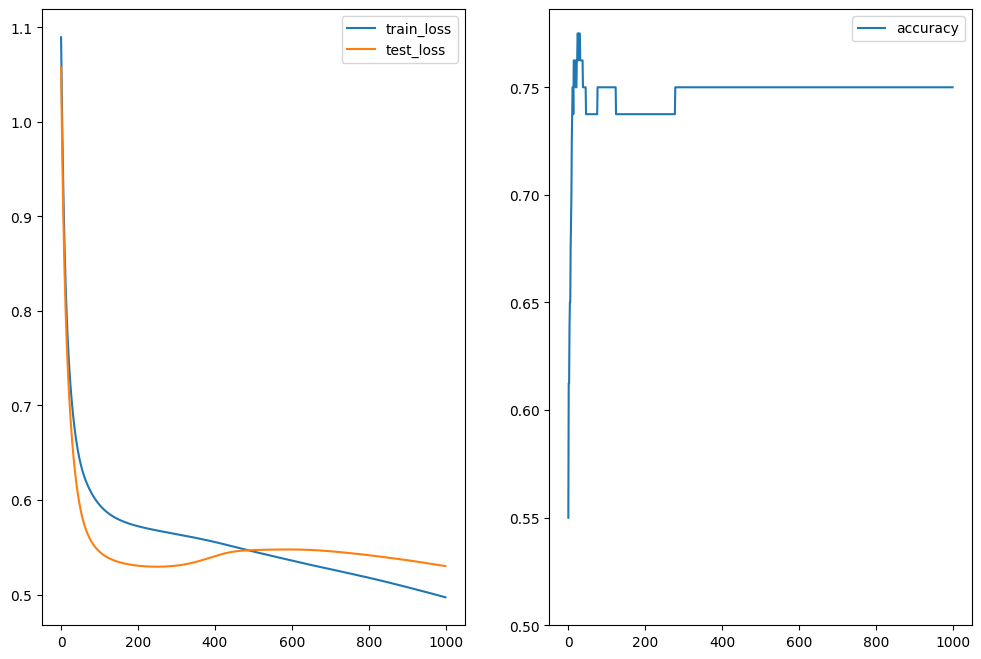

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[['train_loss', 'test_loss' ]].plot( ax=ax1)
df_epochs_data[['accuracy']].plot(ax=ax2)

plt.ylim(bottom= 0.5)
plt.show()